# <font color = red> word to vector </font>

## <mark style=background-color:yellow>1. import 所需套件 </mark> 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

In [3]:
from scipy.spatial.distance import pdist

## <mark style=background-color:grey>視覺化 所需套件 </mark> 

In [4]:
import matplotlib.pyplot as plt

## <mark style=background-color:grey>formatting 所需套件 </mark> 

In [5]:
import locale
locale.setlocale(locale.LC_ALL, '') 

'Chinese (Traditional)_Taiwan.950'

## <mark style=background-color:yellow> function </mark> 

In [6]:
def func_reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value

In [7]:
def func_build_word_vector(text):
    word2id = {w: i for i, w in enumerate(sorted(list(set(func_reduce(lambda a, b: a + b, text)))))}
    id2word = {x[1]: x[0] for x in word2id.items()}
    wvectors = np.zeros((len(word2id), len(word2id)))
    for sentence in text:
        for word1, word2 in zip(sentence[:-1], sentence[1:]):
            id1, id2 = word2id[word1], word2id[word2]
            wvectors[id1, id2] += 1
            wvectors[id2, id1] += 1
    return wvectors, word2id, id2word

$$ Cosine  Similarity餘弦相似度 =  \frac{ A矩陣    X    B矩陣  }{ |A| |B| } $$

In [45]:
def func_cos_sim_oneline(v1, v2):
    print('分子 AB矩陣乘積=', np.dot(v1, v2))
    print('分母A平方累計值&開完根號=', (np.sqrt(np.sum(np.power(v1, 2)))))
    print('分母B平方累計值&開完根號=',np.sqrt(np.sum(np.power(v2, 2))))
    print('最終分母=',(np.sqrt(np.sum(np.power(v1, 2))) * np.sqrt(np.sum(np.power(v2, 2)))))
    return np.dot(v1, v2) / (np.sqrt(np.sum(np.power(v1, 2))) * np.sqrt(np.sum(np.power(v2, 2))))

## <mark style=background-color:grey>Visualization</mark> 

In [81]:
def func_visualize(wvectors, id2word):
    np.random.seed(10)
    fig = plt.figure()
    plt.figure(figsize=(10, 5))
    U, sigma, Vh = np.linalg.svd(wvectors)
    ax = fig.add_subplot(111)
    ax.axis([-1, 1, -1, 1])
    for i in id2word:
        ax.text(U[i, 0], U[i, 1], id2word[i], alpha=0.3, fontsize=30)
    plt.show()

# <mark style=background-color:yellow>Calculate Vectors </mark> 

In [15]:
text = [
    ["the", "dog", "run", ],
    ["a", "cat", "run", ],
    ["a", "dog", "sleep", ],
    ["the", "cat", "sleep", ],
    ["a", "dog", "bark", ],
    ["the", "cat", "meows", ],
    ["the", "bird", "fly", ],
    ["a", "bird", "sleep", ],
]

#text

In [23]:
# call function build_word_vector, get 3 returns
func_build_word_vector(text)

print('type of result=', type(func_build_word_vector(text)))
print('there are ', len(func_build_word_vector(text)),'components in this result' )
print(func_build_word_vector(text),'\n')

for xxx in (func_build_word_vector(text)):
    print(xxx)

type of result= <class 'tuple'>
there are  3 components in this result
(array([[0., 0., 1., 1., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 2.],
       [2., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 1., 0., 0., 0., 0., 0.]]), {'a': 0, 'bark': 1, 'bird': 2, 'cat': 3, 'dog': 4, 'fly': 5, 'meows': 6, 'run': 7, 'sleep': 8, 'the': 9}, {0: 'a', 1: 'bark', 2: 'bird', 3: 'cat', 4: 'dog', 5: 'fly', 6: 'meows', 7: 'run', 8: 'sleep', 9: 'the'}) 

[[0. 0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 2.]
 [2. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0

In [32]:
#use 3 variable to receive 3 return result in a tuple
wvectors, word2id, id2word = func_build_word_vector(text)

print(type(wvectors), '; shape=',wvectors.shape)
print(type(word2id), ' ; length=', len(word2id))
print(type(id2word),' ; length=', len(id2word))

<class 'numpy.ndarray'> ; shape= (10, 10)
<class 'dict'>  ; length= 10
<class 'dict'>  ; length= 10


In [33]:
wvectors

array([[0., 0., 1., 1., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 2.],
       [2., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 1., 0., 0., 0., 0., 0.]])

In [13]:
word2id

{'a': 0,
 'bark': 1,
 'bird': 2,
 'cat': 3,
 'dog': 4,
 'fly': 5,
 'meows': 6,
 'run': 7,
 'sleep': 8,
 'the': 9}

In [14]:
id2word

{0: 'a',
 1: 'bark',
 2: 'bird',
 3: 'cat',
 4: 'dog',
 5: 'fly',
 6: 'meows',
 7: 'run',
 8: 'sleep',
 9: 'the'}

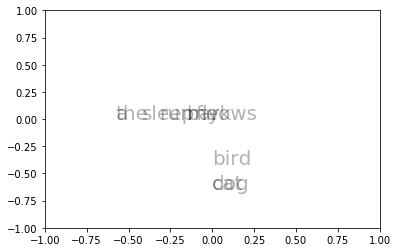

In [50]:
func_visualize(wvectors, id2word)

In [47]:
#call function func_cosine_sim
print('A  dog=', wvectors[word2id["dog"]])
print('B  cat=', wvectors[word2id["cat"]], '\n')

A=wvectors[word2id["dog"]]
B=wvectors[word2id["cat"]]

print('\n cosine similarity=', f'{ (func_cos_sim_oneline(A,B)) :.2f}')

A  dog= [2. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
B  cat= [1. 0. 0. 0. 0. 0. 1. 1. 1. 2.] 

分子 AB矩陣乘積= 6.0
分母A平方累計值&開完根號= 2.8284271247461903
分母B平方累計值&開完根號= 2.8284271247461903
最終分母= 8.000000000000002

 cosine similarity= 0.75


In [49]:
print('A  dog =', wvectors[word2id["dog"]])
print('B  bird=', wvectors[word2id["bird"]], '\n')

A=wvectors[word2id["dog"]]
B=wvectors[word2id["bird"]]

print('\n cosine similarity=', f'{ (func_cos_sim_oneline(A,B)) :.2f}')

A  dog = [2. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
B  bird= [1. 0. 0. 0. 0. 1. 0. 0. 1. 1.] 

分子 AB矩陣乘積= 4.0
分母A平方累計值&開完根號= 2.8284271247461903
分母B平方累計值&開完根號= 2.0
最終分母= 5.656854249492381

 cosine similarity= 0.71


In [51]:
text = [
    ["這", "台", "車", "真好", "我", "從來", "不開他", ],
    ["這", "台", "手機", "真好", "我", "從來", "不用他", ],
    ["這", "台", "機車", "真好", "我", "從來", "不騎他", ],
    ["這", "碗", "咖哩飯", "真好吃", "我", "經常", "來吃", ],
    ["這", "碗", "義大利麵", "真好吃", "我", "經常", "來餐廳吃", ],
    ["這", "台", "車", "真好開", "我", "經常", "開出門", ],
]

In [53]:
func_build_word_vector(text)
wvectors, word2id, id2word = func_build_word_vector(text)

In [61]:
wvectors

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 2., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 3., 2., 1., 0., 3.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.

In [76]:
print(word2id['機車'])
print(word2id['手機'])
print(id2word[10])
print(id2word[9])
print(wvectors[10])

10
9
機車
手機
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


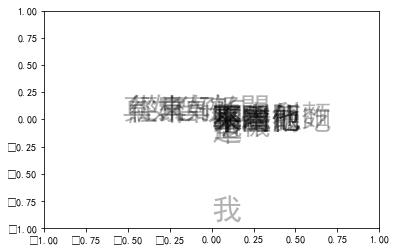

<Figure size 720x360 with 0 Axes>

In [82]:
plt.rcParams['font.sans-serif'] = 'SimHei'

func_visualize(wvectors, id2word)

In [54]:
print('A  真好 =', wvectors[word2id["真好"]])
print('B  真好吃=', wvectors[word2id["真好吃"]], '\n')

A=wvectors[word2id["真好"]]
B=wvectors[word2id["真好吃"]]

print('\n cosine similarity=', f'{ (func_cos_sim_oneline(A,B)) :.2f}')

A  真好 = [0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
B  真好吃= [0. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 

分子 AB矩陣乘積= 6.0
分母A平方累計值&開完根號= 3.4641016151377544
分母B平方累計值&開完根號= 2.449489742783178
最終分母= 8.48528137423857

 cosine similarity= 0.71


In [55]:
print('A  機車 =', wvectors[word2id["機車"]])
print('B  手機 =', wvectors[word2id["手機"]], '\n')

A=wvectors[word2id["機車"]]
B=wvectors[word2id["手機"]]

print('\n cosine similarity=', f'{ (func_cos_sim_oneline(A,B)) :.2f}')

A  機車 = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
B  手機= [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 

分子 AB矩陣乘積= 2.0
分母A平方累計值&開完根號= 1.4142135623730951
分母B平方累計值&開完根號= 1.4142135623730951
最終分母= 2.0000000000000004

 cosine similarity= 1.00


In [57]:
print('A  咖哩飯   =', wvectors[word2id["咖哩飯"]])
print('B  義大利麵 =', wvectors[word2id["義大利麵"]], '\n')

A=wvectors[word2id["咖哩飯"]]
B=wvectors[word2id["義大利麵"]]

print('\n cosine similarity=', f'{ (func_cos_sim_oneline(A,B)) :.2f}')

A  咖哩飯   = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
B  義大利麵 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.] 

分子 AB矩陣乘積= 2.0
分母A平方累計值&開完根號= 1.4142135623730951
分母B平方累計值&開完根號= 1.4142135623730951
最終分母= 2.0000000000000004

 cosine similarity= 1.00
